In [1]:
import napari
import numpy as np
from numpy.lib.format import open_memmap
import myfunctions as mf
import os
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import seaborn as sns
import pandas as pd

### Experiment 0

##### Segmentation visualization

In [4]:
OS = 'Windows'
exp = mf.exp_list()[0]

hypervolume = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume.npy'), mode='r')
hypervolume_mask = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume_mask.npy'), mode='r')
print(hypervolume_mask.shape)
print(hypervolume.shape)

(55, 270, 500, 500)
(55, 270, 500, 500)


In [3]:
viewer = napari.Viewer()

images = [viewer.add_image(hypervolume[:,100:150], name='Volume', opacity=0.4)]
labels = [viewer.add_labels(hypervolume_mask[:,100:150], name='Labels', blending='additive', opacity=0.8)]

settings = napari.settings.get_settings()
settings.application.playback_fps = 5
viewer.dims.current_step = (0, 0)

##### Data plotting from <code>pd.DataFrame</code>

In [ ]:
df = pd.read_csv(os.path.join(mf.OS_path(exp, OS), 'motion_properties.csv'))

In [6]:
plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-muted')
time_axis = np.arange(len(np.unique(df['t'])))/20

Volume of the agglomerates

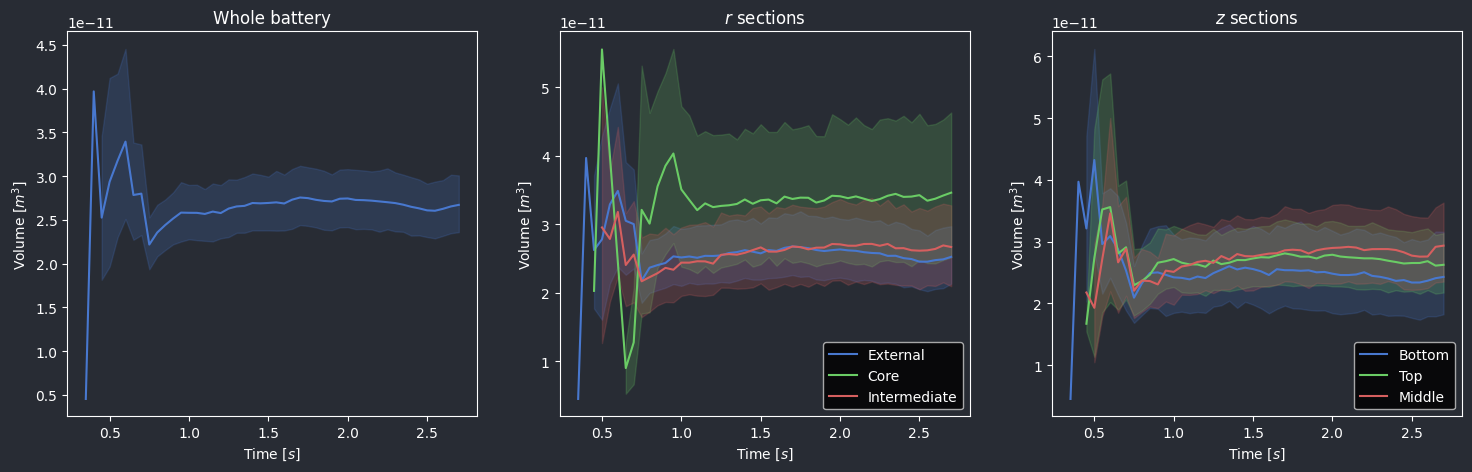

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), facecolor='#282C34')
# fig.suptitle('Agglomerates volume vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='V')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='V', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='V', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Volume [$m^3$]')

Speed of the agglomerates

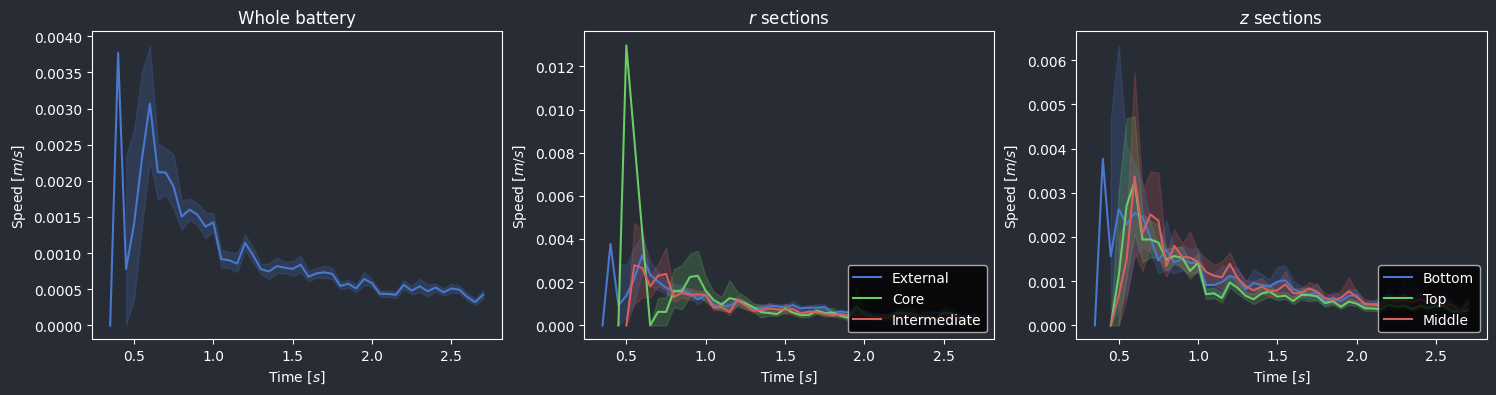

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='#282C34')
# fig.suptitle('Agglomerates speed vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='v')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='v', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='v', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Speed [$m/s$]')

Volume expansion rate of the agglomerates

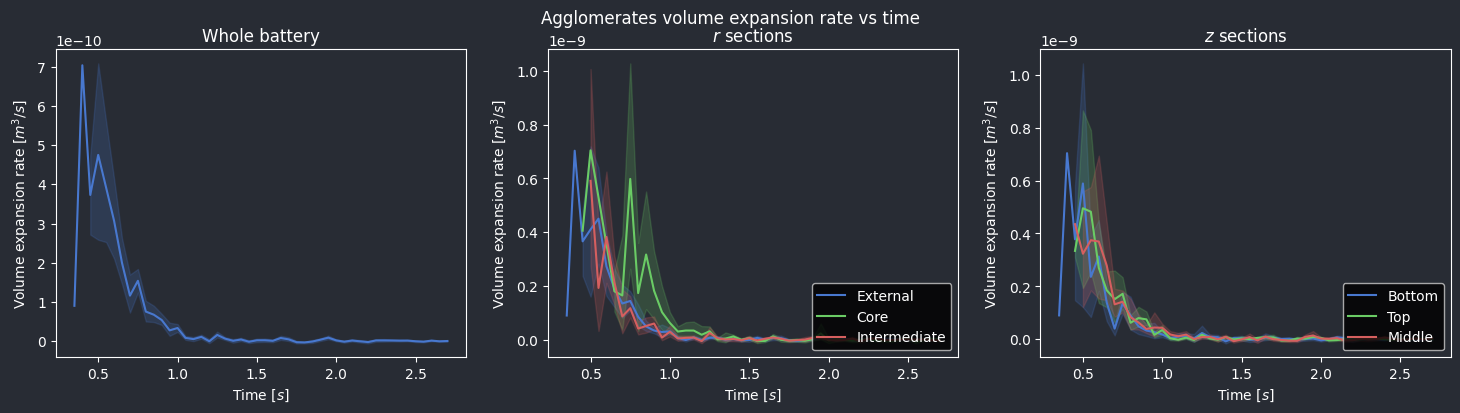

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='#282C34')
fig.suptitle('Agglomerates volume expansion rate vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='dVdt')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='dVdt', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='dVdt', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Volume expansion rate [$m^3/s$]')

Region-wise density of agglomerates

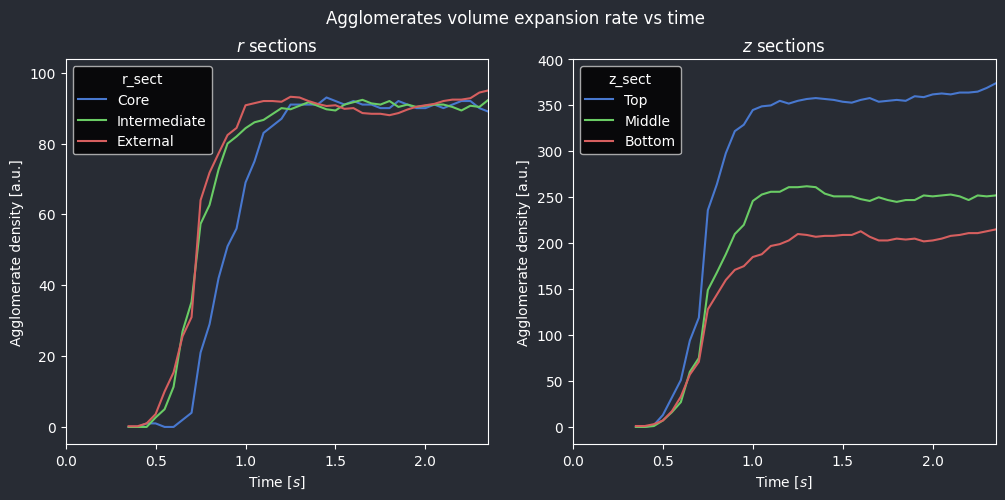

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor='#282C34')
fig.suptitle('Agglomerates volume expansion rate vs time')

agg_number_r = pd.DataFrame(columns=['Time', 'Number', 'r_sect'])
agg_number_z = pd.DataFrame(columns=['Time', 'Number', 'z_sect'])
r_sect_list = ['Core', 'Intermediate', 'External']
z_sect_list = ['Top', 'Middle', 'Bottom']
for t in (np.unique(df['t'])):
    for r, z in zip(r_sect_list, z_sect_list):
        agg_number_r = pd.concat([agg_number_r, pd.DataFrame([[t, 0, r]], columns=['Time', 'Number', 'r_sect'])], ignore_index=True)
        agg_number_z = pd.concat([agg_number_z, pd.DataFrame([[t, 0, z]], columns=['Time', 'Number', 'z_sect'])], ignore_index=True)
for i in range(len(df)):
    agg_number_r.loc[(agg_number_r['Time'] == df['t'][i]) & (agg_number_r['r_sect'] == df['r_sect'][i]), 'Number'] += 1
    agg_number_z.loc[(agg_number_z['Time'] == df['t'][i]) & (agg_number_z['z_sect'] == df['z_sect'][i]), 'Number'] += 1

agg_number_r.loc[agg_number_r['r_sect'] == 'Intermediate', 'Number'] = agg_number_r.loc[agg_number_r['r_sect'] == 'Intermediate', 'Number'] / 3
agg_number_r.loc[agg_number_r['r_sect'] == 'External', 'Number'] = agg_number_r.loc[agg_number_r['r_sect'] == 'External', 'Number'] / 5

sns.lineplot(ax=axs[0], data=agg_number_r, x='Time', y='Number', hue='r_sect')
axs[0].set_title('$r$ sections')

sns.lineplot(ax=axs[1], data=agg_number_z, x='Time', y='Number', hue='z_sect')
axs[1].set_title('$z$ sections')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Agglomerate density [a.u.]')

### Experiment 1

##### Segmentation visualization

In [2]:
OS = 'MacOS'
exp = mf.exp_list()[1]

hypervolume = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume.npy'), mode='r')
hypervolume_mask = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume_mask.npy'), mode='r+')
print(hypervolume_mask.shape)
print(hypervolume.shape)

(61, 270, 500, 500)
(61, 270, 500, 500)


In [4]:
viewer = napari.Viewer()

images = [viewer.add_image(hypervolume[:,:], name='Volume', opacity=0.4)]
labels = [viewer.add_labels(hypervolume_mask[:,:], name='Labels', blending='additive', opacity=0.8)]

settings = napari.settings.get_settings()
settings.application.playback_fps = 5
viewer.dims.current_step = (0, 0)

##### Data plotting from <code>pd.DataFrame</code>

In [5]:
df = pd.read_csv(os.path.join(mf.OS_path(exp, OS), 'motion_properties.csv'))

In [6]:
plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-muted')
time_axis = np.arange(len(np.unique(df['t'])))/20

Volume of the agglomerates

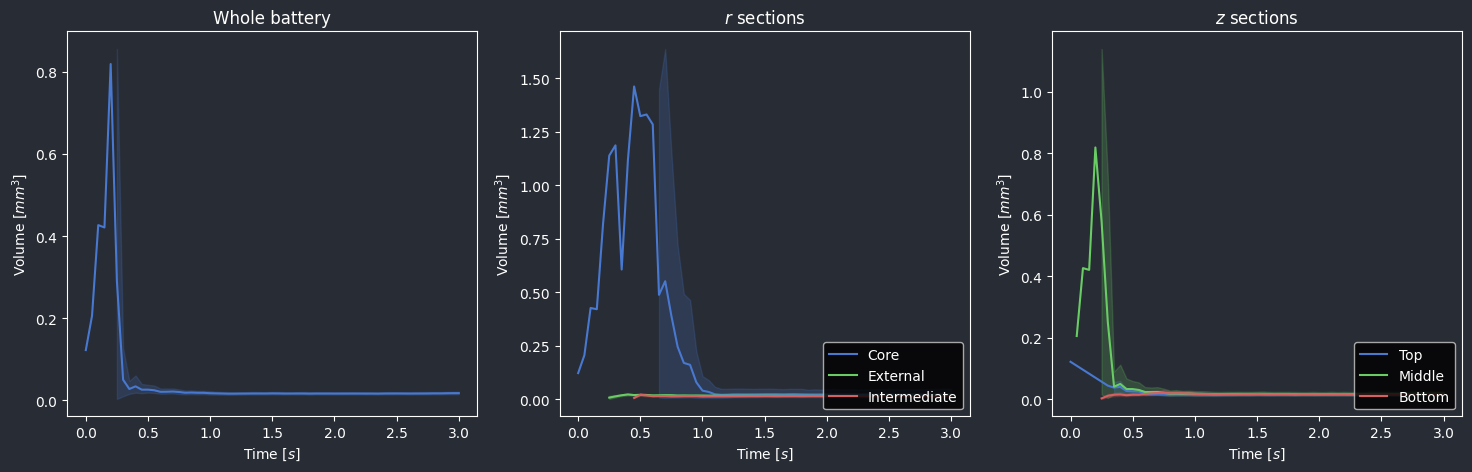

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), facecolor='#282C34')
# fig.suptitle('Agglomerates volume vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='V')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='V', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='V', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Volume [$mm^3$]')

Speed of the agglomerates

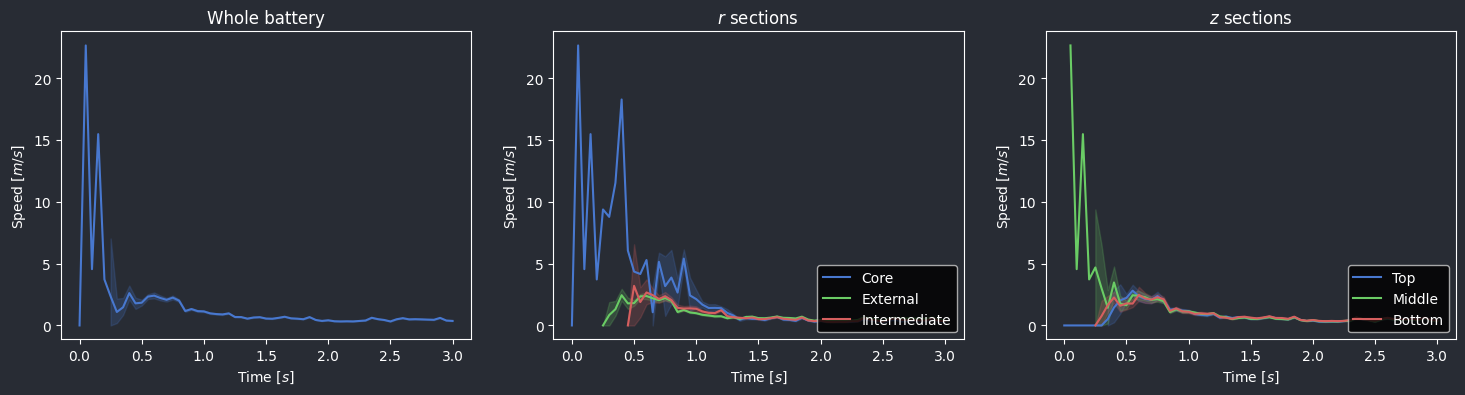

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='#282C34')
# fig.suptitle('Agglomerates speed vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='v')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='v', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='v', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Speed [$m/s$]')

Volume expansion rate of the agglomerates

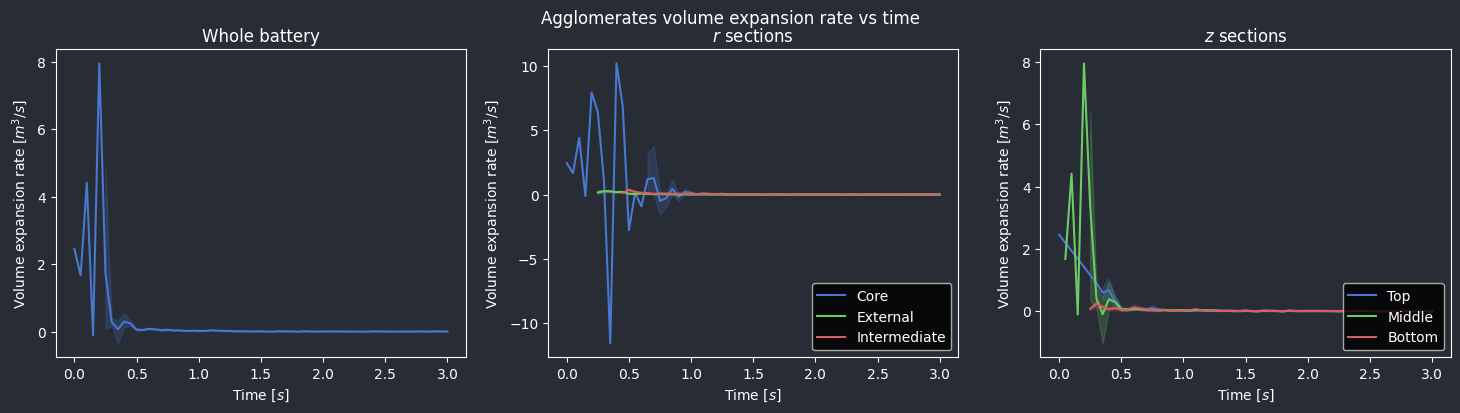

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='#282C34')
fig.suptitle('Agglomerates volume expansion rate vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='dVdt')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='dVdt', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='dVdt', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Volume expansion rate [$m^3/s$]')

Region-wise density of agglomerates

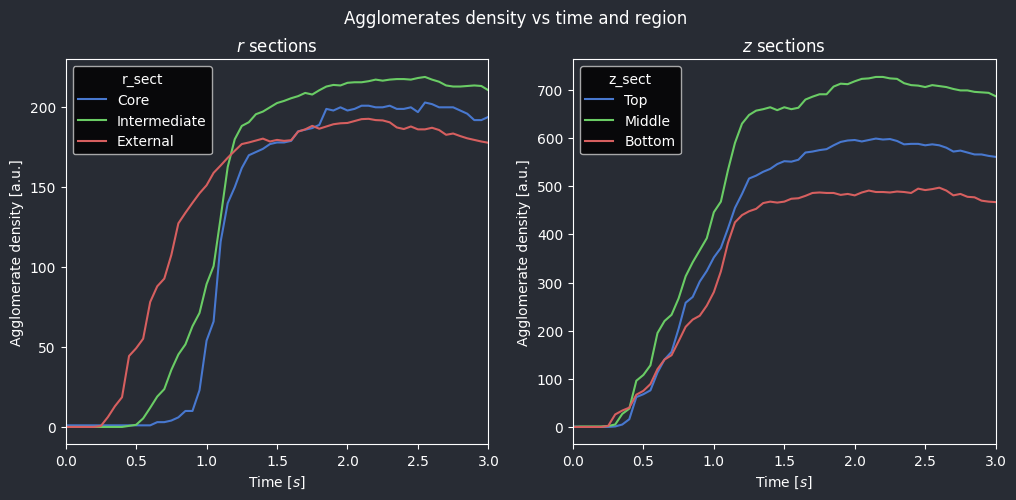

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor='#282C34')
fig.suptitle('Agglomerates density vs time and region')

agg_number_r = pd.DataFrame(columns=['Time', 'Number', 'r_sect'])
agg_number_z = pd.DataFrame(columns=['Time', 'Number', 'z_sect'])
r_sect_list = ['Core', 'Intermediate', 'External']
z_sect_list = ['Top', 'Middle', 'Bottom']
for t in (np.unique(df['t'])):
    for r, z in zip(r_sect_list, z_sect_list):
        agg_number_r = pd.concat([agg_number_r, pd.DataFrame([[t, 0, r]], columns=['Time', 'Number', 'r_sect'])], ignore_index=True)
        agg_number_z = pd.concat([agg_number_z, pd.DataFrame([[t, 0, z]], columns=['Time', 'Number', 'z_sect'])], ignore_index=True)
for i in range(len(df)):
    agg_number_r.loc[(agg_number_r['Time'] == df['t'][i]) & (agg_number_r['r_sect'] == df['r_sect'][i]), 'Number'] += 1
    agg_number_z.loc[(agg_number_z['Time'] == df['t'][i]) & (agg_number_z['z_sect'] == df['z_sect'][i]), 'Number'] += 1

agg_number_r.loc[agg_number_r['r_sect'] == 'Intermediate', 'Number'] = agg_number_r.loc[agg_number_r['r_sect'] == 'Intermediate', 'Number'] / 3
agg_number_r.loc[agg_number_r['r_sect'] == 'External', 'Number'] = agg_number_r.loc[agg_number_r['r_sect'] == 'External', 'Number'] / 5

sns.lineplot(ax=axs[0], data=agg_number_r, x='Time', y='Number', hue='r_sect')
axs[0].set_title('$r$ sections')

sns.lineplot(ax=axs[1], data=agg_number_z, x='Time', y='Number', hue='z_sect')
axs[1].set_title('$z$ sections')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Agglomerate density [a.u.]')

### Experiment 2

##### Segmentation visualization

In [2]:
OS = 'Windows'
exp = mf.exp_list()[2]

hypervolume = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume.npy'), mode='r')
hypervolume_mask = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume_mask.npy'), mode='r')
print(hypervolume_mask.shape)
print(hypervolume.shape)

(66, 270, 500, 500)
(66, 270, 500, 500)


In [10]:
viewer = napari.Viewer()

images = [viewer.add_image(hypervolume[:,:50], name='Volume', opacity=0.4)]
labels = [viewer.add_labels(hypervolume_mask[:,:50], name='Labels', blending='additive', opacity=0.8)]

settings = napari.settings.get_settings()
settings.application.playback_fps = 5
viewer.dims.current_step = (0, 0)

##### Data plotting from <code>pd.DataFrame</code>

In [3]:
df = pd.read_csv(os.path.join(mf.OS_path(exp, OS), 'motion_properties.csv'))

In [4]:
plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-muted')
time_axis = np.arange(len(np.unique(df['t'])))/20

Volume of the agglomerates

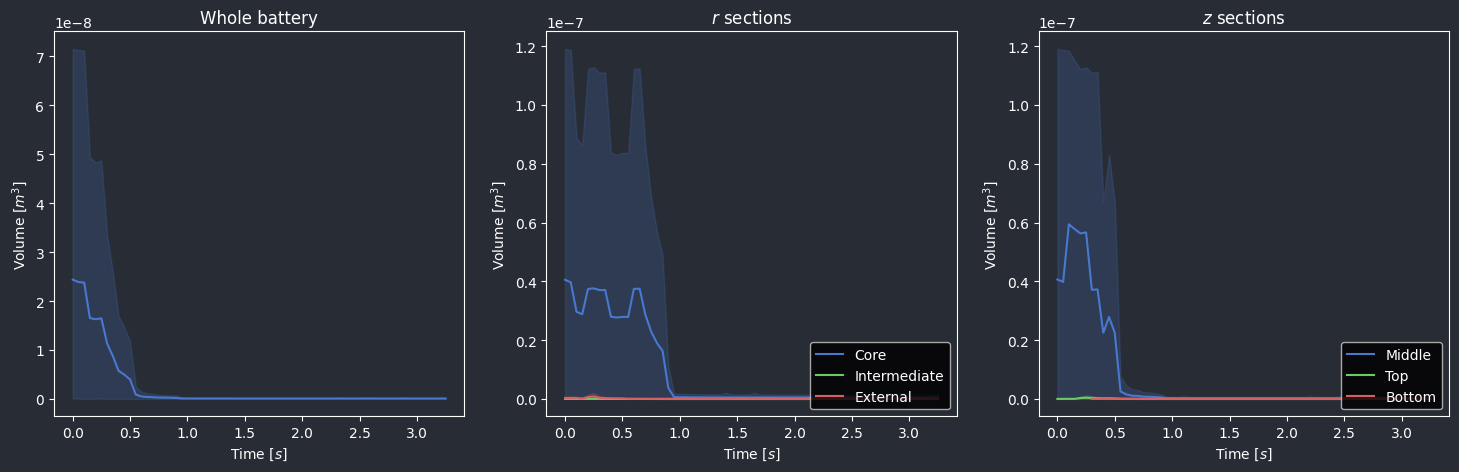

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), facecolor='#282C34')
# fig.suptitle('Agglomerates volume vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='V')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='V', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='V', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Volume [$m^3$]')

Speed of the agglomerates

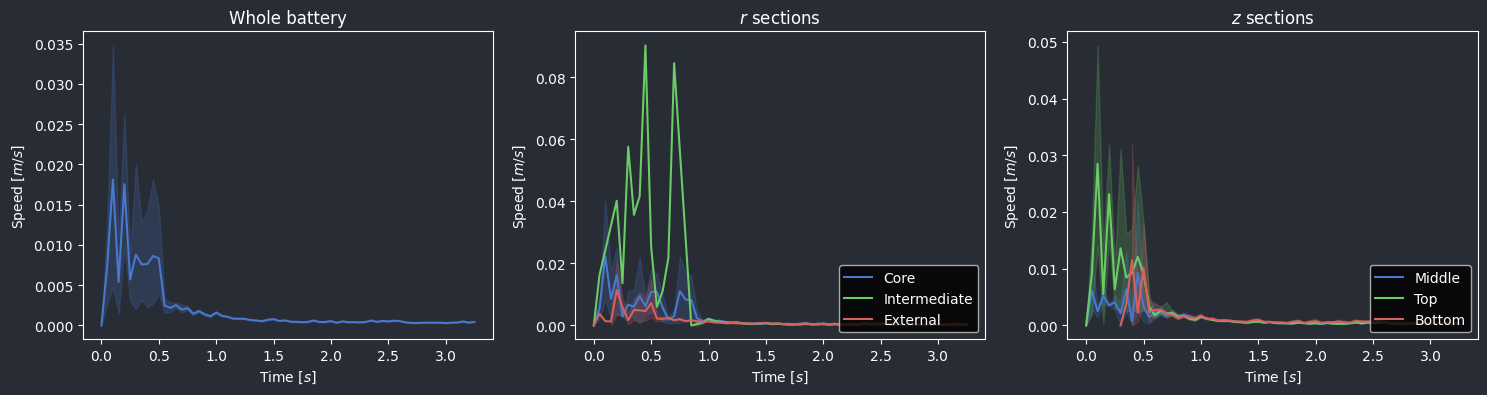

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='#282C34')
# fig.suptitle('Agglomerates speed vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='v')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='v', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='v', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Speed [$m/s$]')

Volume expansion rate of the agglomerates

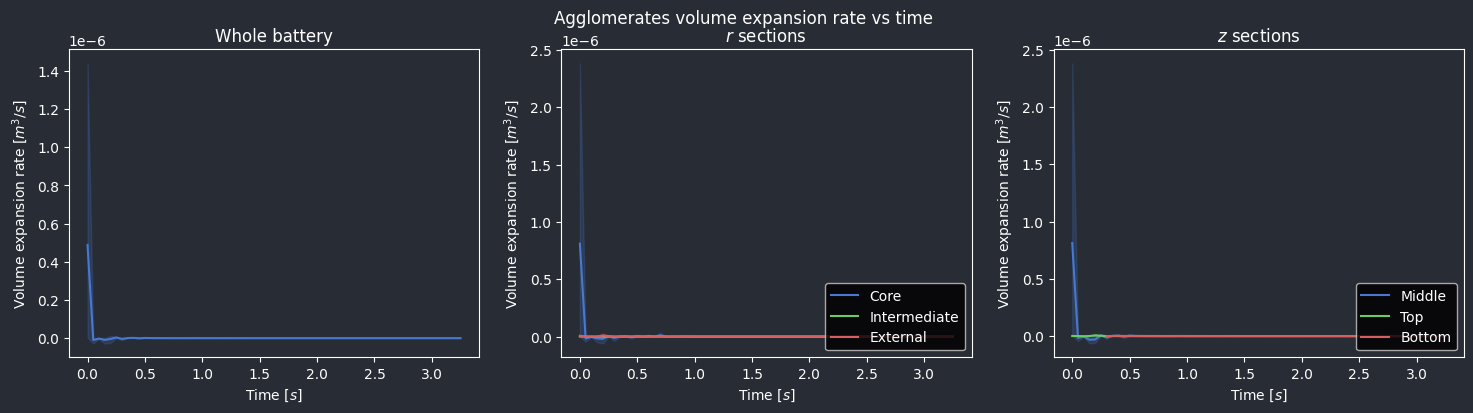

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='#282C34')
fig.suptitle('Agglomerates volume expansion rate vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='dVdt')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='dVdt', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='dVdt', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Volume expansion rate [$m^3/s$]')

Region-wise density of agglomerates

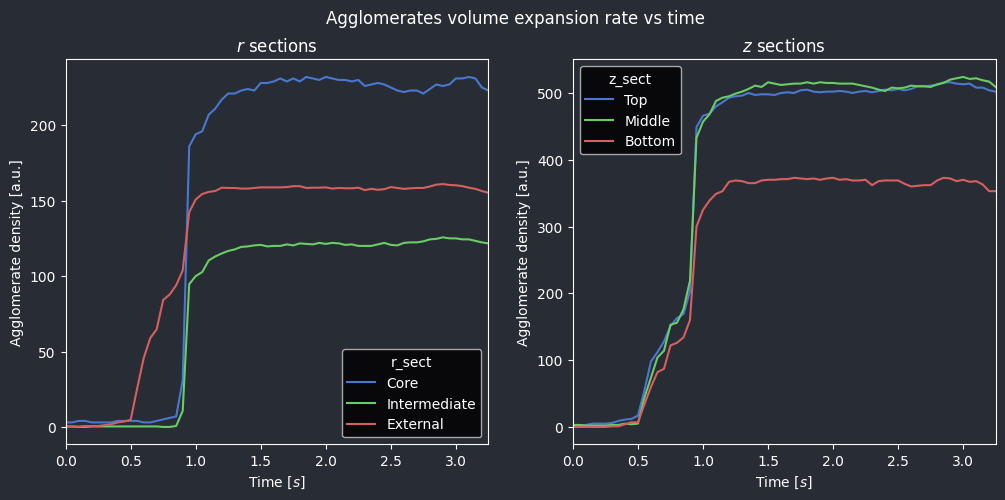

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor='#282C34')
fig.suptitle('Agglomerates volume expansion rate vs time')

agg_number_r = pd.DataFrame(columns=['Time', 'Number', 'r_sect'])
agg_number_z = pd.DataFrame(columns=['Time', 'Number', 'z_sect'])
r_sect_list = ['Core', 'Intermediate', 'External']
z_sect_list = ['Top', 'Middle', 'Bottom']
for t in (np.unique(df['t'])):
    for r, z in zip(r_sect_list, z_sect_list):
        agg_number_r = pd.concat([agg_number_r, pd.DataFrame([[t, 0, r]], columns=['Time', 'Number', 'r_sect'])], ignore_index=True)
        agg_number_z = pd.concat([agg_number_z, pd.DataFrame([[t, 0, z]], columns=['Time', 'Number', 'z_sect'])], ignore_index=True)
for i in range(len(df)):
    agg_number_r.loc[(agg_number_r['Time'] == df['t'][i]) & (agg_number_r['r_sect'] == df['r_sect'][i]), 'Number'] += 1
    agg_number_z.loc[(agg_number_z['Time'] == df['t'][i]) & (agg_number_z['z_sect'] == df['z_sect'][i]), 'Number'] += 1

agg_number_r.loc[agg_number_r['r_sect'] == 'Intermediate', 'Number'] = agg_number_r.loc[agg_number_r['r_sect'] == 'Intermediate', 'Number'] / 3
agg_number_r.loc[agg_number_r['r_sect'] == 'External', 'Number'] = agg_number_r.loc[agg_number_r['r_sect'] == 'External', 'Number'] / 5

sns.lineplot(ax=axs[0], data=agg_number_r, x='Time', y='Number', hue='r_sect')
axs[0].set_title('$r$ sections')

sns.lineplot(ax=axs[1], data=agg_number_z, x='Time', y='Number', hue='z_sect')
axs[1].set_title('$z$ sections')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Agglomerate density [a.u.]')